# From RGB colorspace to HSV colorspace
In HSV colorspace, HSV stands for hue, saturation, and value. It is another digital color representation for images. In this notebook, we try to convert satellite images from RGB colorspace to HSV colorspace.

In [1]:
import colorsys
import tifffile as tiff
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

Transform tiff file to a regular 3-dimensional matrix in computer.

In [2]:
def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 0, axis=0)
    maxs = np.percentile(matrix, 100, axis=0) - mins
    matrix = (matrix - mins[None, :]) / (maxs[None, :])
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

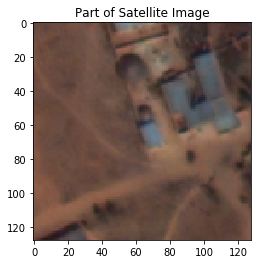

In [3]:
I = tiff.imread('6030_2_1.tif').transpose([1,2,0])
im_rgb = scale_percentile(I)

I1 = im_rgb[1520:1520+128, 2550:2550+128]
plt.imshow(I1)
plt.title('Part of Satellite Image')

## From RGB colorspace to HSV colorspace

In [4]:
I2 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        hsv = colorsys.rgb_to_hsv(I1[i,j,0],I1[i,j,1],I1[i,j,2])
        I2[i,j,0] = hsv[0]
        I2[i,j,1] = hsv[1]
        I2[i,j,2] = hsv[2]

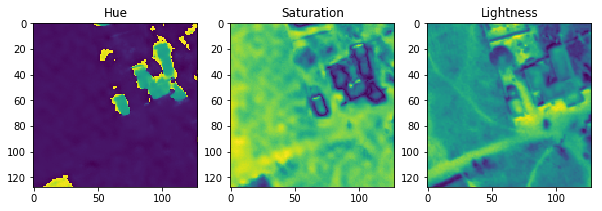

In [5]:
# I2[:,:,2][np.where((I2[:,:,0] < 0.4))] = 0
# I2[:,:,2][np.where((I2[:,:,0] > 0.8))] = 0

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=[10,6])
ax0.imshow(I2[:,:,0])
ax0.set_title("Hue")

ax1.imshow(I2[:,:,1])
ax1.set_title('Saturation')

ax2.imshow(I2[:,:,2])
ax2.set_title('Lightness')

We can see that the saturation image discribe the building outline well.

## From HSV colorspace to RGB colorspace

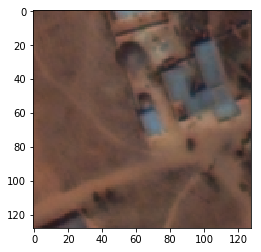

In [6]:
I3 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        rgb = colorsys.hsv_to_rgb(I2[i,j,0],I2[i,j,1],I2[i,j,2])
        I3[i,j,0] = rgb[0]
        I3[i,j,1] = rgb[1]
        I3[i,j,2] = rgb[2]
plt.imshow(I3)